In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

### Estudo com diferentes algoritmos de machine learning em três bases dferentes

<p style="color:blue">Base de dados: Credit</p>
<p style="color:red">Base de dados: CENSUS</p>
<p style="color:green">Base de dados: Risco de credito</p>


In [9]:
# Base de dados Credit
base_credit = pd.read_csv('base_credit.csv')
base_credit.head()

,Unnamed: 0,clientid,income,age,loan,default
0,0,1,66155.925095,59.017015,8106.532131,0
1,1,2,34415.153966,48.117153,6564.745018,0
2,2,3,57317.170063,63.108049,8020.953296,0
3,3,4,42709.534201,45.751972,6103.642260,0
4,4,5,66952.688845,18.584336,8770.099235,1


In [10]:
# Base de dados Census
base_census = pd.read_csv('Bases de dados/census.csv')
base_census.head()

,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [11]:
# Base de dados Risco de Credito
base_risco_credito = pd.read_csv('Bases de dados/risco_credito.csv')
base_risco_credito.head()

,historia,divida,garantias,renda,risco
0,ruim,alta,nenhuma,0_15,alto
1,desconhecida,alta,nenhuma,15_35,alto
2,desconhecida,baixa,nenhuma,15_35,moderado
3,desconhecida,baixa,nenhuma,acima_35,alto
4,desconhecida,baixa,nenhuma,acima_35,baixo


# Random Forest

In [1]:
from sklearn.ensemble import RandomForestClassifier

## Base risco de crédito

In [5]:
import pickle
with open('credit.pkl', 'rb') as f: #Chama a variavel salva com todas as configurações do algoritmo 
    x_credit_treinamento, y_credit_treinamento, x_credit_teste, y_credit_teste = pickle.load(f)

In [6]:
random_forest_credit = RandomForestClassifier(n_estimators=40,criterion='entropy',random_state=0)
random_forest_credit.fit(x_credit_treinamento,y_credit_treinamento)

RandomForestClassifier(criterion='entropy', n_estimators=40, random_state=0)

In [8]:
previsoes = random_forest_credit.predict(x_credit_teste)


In [9]:
from sklearn.metrics import accuracy_score, classification_report
accuracy_score(y_credit_teste, previsoes)

0.984

0.984

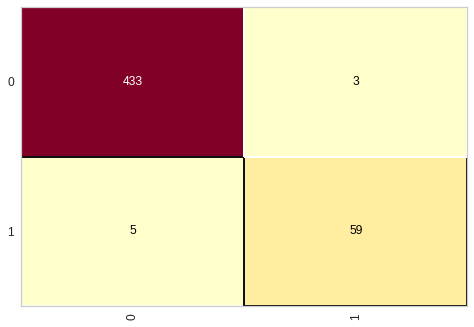

In [11]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(random_forest_credit)
cm.fit(x_credit_treinamento, y_credit_treinamento)
cm.score(x_credit_teste, y_credit_teste)

In [13]:
print(classification_report(y_credit_teste, previsoes))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       436
           1       0.95      0.92      0.94        64

    accuracy                           0.98       500
   macro avg       0.97      0.96      0.96       500
weighted avg       0.98      0.98      0.98       500



## Base credit data

In [20]:
with open('credit.pkl', 'rb') as f: #Chama a variavel salva com todas as configurações do algoritmo 
    x_credit_treinamento, y_credit_treinamento, x_credit_teste, y_credit_teste = pickle.load(f)

In [22]:
arvore_credit = DecisionTreeClassifier(criterion= 'entropy', random_state= 0)
arvore_credit.fit(x_credit_treinamento, y_credit_treinamento)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [24]:
previsoes = arvore_credit.predict(x_credit_teste) 

In [25]:
from sklearn.metrics import accuracy_score, classification_report
accuracy_score(y_credit_teste, previsoes)

0.982

0.982

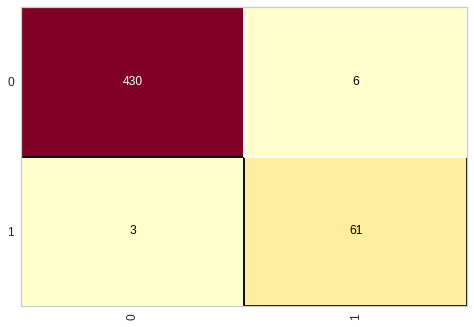

In [26]:
 from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(arvore_credit)
cm.fit(x_credit_treinamento, y_credit_treinamento)
cm.score(x_credit_teste, y_credit_teste)

In [27]:
print(classification_report(y_credit_teste, previsoes))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       436
           1       0.91      0.95      0.93        64

    accuracy                           0.98       500
   macro avg       0.95      0.97      0.96       500
weighted avg       0.98      0.98      0.98       500



## Base census

In [14]:
with open('census.pkl', 'rb') as f:
    x_census_treinamento,x_census_teste,y_census_treinamento,y_census_teste = pickle.load(f)

In [15]:
random_forest_census= RandomForestClassifier(n_estimators=100,criterion='entropy',random_state=0)
random_forest_census.fit(x_census_treinamento,y_census_treinamento)   

RandomForestClassifier(criterion='entropy', random_state=0)

In [16]:
previsoes = random_forest_census.predict(x_census_teste)


In [17]:
accuracy_score(y_census_teste,previsoes)

0.8507676560900717

0.8507676560900717

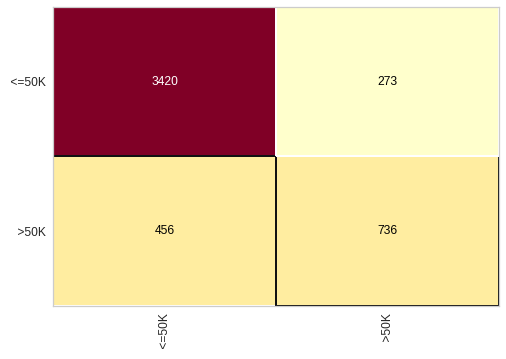

In [19]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(random_forest_census)
cm.fit(x_census_treinamento, y_census_treinamento)
cm.score(x_census_teste, y_census_teste)

In [20]:
print(classification_report(y_census_teste, previsoes))

              precision    recall  f1-score   support

       <=50K       0.88      0.93      0.90      3693
        >50K       0.73      0.62      0.67      1192

    accuracy                           0.85      4885
   macro avg       0.81      0.77      0.79      4885
weighted avg       0.85      0.85      0.85      4885

